#### Dependencies

In [412]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Working Directory

In [413]:
working_dir = os.getcwd()

#### Reading Data set¶

In [414]:
unemployment_data= '../Resources/Unemployment.csv'
df = pd.read_csv(os.path.join(working_dir, unemployment_data))

#### EDA¶

In [415]:
df.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


#### Info

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316633 entries, 0 to 316632
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FIPS_Code  316633 non-null  int64  
 1   State      316633 non-null  object 
 2   Area_Name  316633 non-null  object 
 3   Attribute  316633 non-null  object 
 4   Value      316633 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.1+ MB


#### States Col

In [417]:
df['State'].unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

#### Extracting year

In [418]:
df['Date'] = df['Attribute'].str.extract('(\d+)')
df['Date'] = pd.to_datetime(df['Date'])

#### Modifying Attributes column

In [419]:
df['Attribute']= df['Attribute'].str.replace('_\d+', '',regex=True)

#### Re-Orginizing cols

In [420]:
df=df[['Date','State','Area_Name','Attribute','Value','FIPS_Code']]
df.head()

,Date,State,Area_Name,Attribute,Value,FIPS_Code
0,2000-01-01,US,United States,Civilian_labor_force,142601576.0,0
1,2000-01-01,US,United States,Employed,136904853.0,0
2,2000-01-01,US,United States,Unemployed,5696723.0,0
3,2000-01-01,US,United States,Unemployment_rate,4.0,0
4,2001-01-01,US,United States,Civilian_labor_force,143786537.0,0


#### Pivot Table

In [421]:
df_pivot = pd.pivot_table(df,values = 'Value',index=['Date','State','Area_Name'],columns=['Attribute'])
df_pivot.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                                          319777.0   
                 Aleutians East Borough, AK                         942.0   
                 Aleutians West Census Area, AK                    2738.0   
                 Anchorage Borough/municipality, AK              140750.0   
                 Bethel Census Area, AK                            6406.0   

Attribute                                            Employed  \
Date       State Area_Name                                      
2000-01-01 AK    Alaska                              299590.0   
                 Aleutians East Borough, AK             860.0   
                 Aleutians West Census Area, AK        2597.0   
                 Anchorage Borough/municipality, AK  133661.0   
                 Bethel Census Area, AK                5833.0   

Attribute                                            Med_HH_Income_Percent_of_State_Total  \
Date       State Area_Name                                                                  
2000-01-01 AK    Alaska                                                               NaN   
                 Aleutians East Borough, AK                                           NaN   
                 Aleutians West Census Area, AK                                       NaN   
                 Anchorage Borough/municipality, AK                                   NaN   
                 Bethel Census Area, AK                                               NaN   

Attribute                                            Median_Household_Income  \
Date       State Area_Name                                                     
2000-01-01 AK    Alaska                                                  NaN   
                 Aleutians East Borough, AK                              NaN   
                 Aleutians West Census Area, AK                          NaN   
                 Anchorage Borough/municipality, AK                      NaN   
                 Bethel Census Area, AK                                  NaN   

Attribute                                            Metro  \
Date       State Area_Name                                   
2000-01-01 AK    Alaska                                NaN   
                 Aleutians East Borough, AK            NaN   
                 Aleutians West Census Area, AK        NaN   
                 Anchorage Borough/municipality, AK    NaN   
                 Bethel Census Area, AK                NaN   

Attribute                                            Rural_Urban_Continuum_Code  \
Date       State Area_Name                                                        
2000-01-01 AK    Alaska                                                     NaN   
                 Aleutians East Borough, AK                                 NaN   
                 Aleutians West Census Area, AK                             NaN   
                 Anchorage Borough/municipality, AK                         NaN   
                 Bethel Census Area, AK                                     NaN   

Attribute                                            Unemployed  \
Date       State Area_Name                                        
2000-01-01 AK    Alaska                                 20187.0   
                 Aleutians East Borough, AK                82.0   
                 Aleutians West Census Area, AK           141.0   
                 Anchorage Borough/municipality, AK      7089.0   
                 Bethel Census Area, AK                   573.0   

Attribute                                            Unemployment_rate  \
Date       State Area_Name                                               
2000-01-01 AK    Alaska                                            6.3   
                 Aleutians East Borough, AK                        8.7   
        

In [422]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75128 entries, (Timestamp('2000-01-01 00:00:00'), 'AK', 'Alaska') to (Timestamp('2022-01-01 00:00:00'), 'WY', 'Wyoming')
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Civilian_labor_force                  75123 non-null  float64
 1   Employed                              75123 non-null  float64
 2   Med_HH_Income_Percent_of_State_Total  3192 non-null   float64
 3   Median_Household_Income               3193 non-null   float64
 4   Metro                                 3224 non-null   float64
 5   Rural_Urban_Continuum_Code            3219 non-null   float64
 6   Unemployed                            75123 non-null  float64
 7   Unemployment_rate                     75123 non-null  float64
 8   Urban_Influence_Code                  3219 non-null   float64
dtypes: float64(9)
memory usage: 5.5+ MB


#### Na count Viz

<Axes: xlabel='Attribute'>

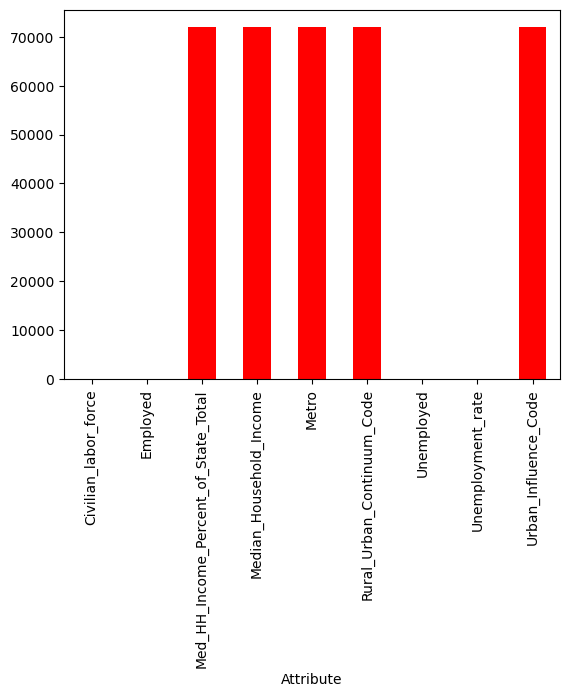

In [423]:
df_pivot.isna().sum().plot(kind='bar',color='red')

In [424]:
df_pivot.drop(columns = ['Med_HH_Income_Percent_of_State_Total', 'Median_Household_Income','Metro', 'Rural_Urban_Continuum_Code','Urban_Influence_Code'],
              inplace=True)

#### Dropped NA cols

In [425]:
df_pivot.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                                          319777.0   
                 Aleutians East Borough, AK                         942.0   
                 Aleutians West Census Area, AK                    2738.0   
                 Anchorage Borough/municipality, AK              140750.0   
                 Bethel Census Area, AK                            6406.0   

Attribute                                            Employed  Unemployed  \
Date       State Area_Name                                                  
2000-01-01 AK    Alaska                              299590.0     20187.0   
                 Aleutians East Borough, AK             860.0        82.0   
                 Aleutians West Census Area, AK        2597.0       141.0   
                 Anchorage Borough/municipality, AK  133661.0      7089.0   
                 Bethel Census Area, AK                5833.0       573.0   

Attribute                                            Unemployment_rate  
Date       State Area_Name                                              
2000-01-01 AK    Alaska                                            6.3  
                 Aleutians East Borough, AK                        8.7  
                 Aleutians West Census Area, AK                    5.1  
                 Anchorage Borough/municipality, AK                5.0  
                 Bethel Census Area, AK                            8.9

In [426]:
df_pivot.tail()

Attribute                             Civilian_labor_force  Employed  \
Date       State Area_Name                                             
2022-01-01 WY    Teton County, WY                  16647.0   16193.0   
                 Uinta County, WY                   8863.0    8524.0   
                 Washakie County, WY                3858.0    3704.0   
                 Weston County, WY                  3792.0    3691.0   
                 Wyoming                          291756.0  281343.0   

Attribute                             Unemployed  Unemployment_rate  
Date       State Area_Name                                           
2022-01-01 WY    Teton County, WY          454.0                2.7  
                 Uinta County, WY          339.0                3.8  
                 Washakie County, WY       154.0                4.0  
                 Weston County, WY         101.0                2.7  
                 Wyoming                 10413.0                3.6

#### Year subset

In [427]:
df_date = df_pivot['2018-01-01':'2022-01-01'][:][:]
df_date.head()

Attribute                                            Civilian_labor_force  \
Date       State Area_Name                                                  
2018-01-01 AK    Alaska                                          355499.0   
                 Aleutians East Borough, AK                        2316.0   
                 Aleutians West Census Area, AK                    3639.0   
                 Anchorage Borough/municipality, AK              150748.0   
                 Bethel Census Area, AK                            7136.0   

Attribute                                            Employed  Unemployed  \
Date       State Area_Name                                                  
2018-01-01 AK    Alaska                              334068.0     21431.0   
                 Aleutians East Borough, AK            2250.0        66.0   
                 Aleutians West Census Area, AK        3521.0       118.0   
                 Anchorage Borough/municipality, AK  143152.0      7596.0   
                 Bethel Census Area, AK                6287.0       849.0   

Attribute                                            Unemployment_rate  
Date       State Area_Name                                              
2018-01-01 AK    Alaska                                            6.0  
                 Aleutians East Borough, AK                        2.8  
                 Aleutians West Census Area, AK                    3.2  
                 Anchorage Borough/municipality, AK                5.0  
                 Bethel Census Area, AK                           11.9

#### NY State

In [428]:
df_NY = df_date.loc(axis=0)[:,['NY']]
df_NY

Attribute                                Civilian_labor_force  Employed  \
Date       State Area_Name                                                
2018-01-01 NY    Albany County, NY                   161009.0  155092.0   
                 Allegany County, NY                  19908.0   18802.0   
                 Bronx County, NY                    626880.0  591303.0   
                 Broome County, NY                    85989.0   81836.0   
                 Cattaraugus County, NY               34788.0   32949.0   
...                                                       ...       ...   
2022-01-01 NY    Washington County, NY                27552.0   26662.0   
                 Wayne County, NY                     43492.0   42101.0   
                 Westchester County, NY              496415.0  480910.0   
                 Wyoming County, NY                   17510.0   16899.0   
                 Yates County, NY                     11671.0   11328.0   

Attribute                                Unemployed  Unemployment_rate  
Date       State Area_Name                                              
2018-01-01 NY    Albany County, NY           5917.0                3.7  
                 Allegany County, NY         1106.0                5.6  
                 Bronx County, NY           35577.0                5.7  
                 Broome County, NY           4153.0                4.8  
                 Cattaraugus County, NY      1839.0                5.3  
...                                             ...                ...  
2022-01-01 NY    Washington County, NY        890.0                3.2  
                 Wayne County, NY            1391.0                3.2  
                 Westchester County, NY     15505.0                3.1  
                 Wyoming County, NY           611.0                3.5  
                 Yates County, NY             343.0                2.9  

[315 rows x 4 columns]

#### Bronx NY

In [567]:
df_Bronx = df_NY.loc(axis=0)[:,['NY'],['Bronx County, NY']]
df_Bronx

,,Attribute,Civilian_labor_force,Employed,Unemployed,Unemployment_rate
Date,State,Area_Name,,,,
2018-01-01,NY,"Bronx County, NY",626880.0,591303.0,35577.0,5.7
2019-01-01,NY,"Bronx County, NY",625009.0,591519.0,33490.0,5.4
2020-01-01,NY,"Bronx County, NY",613416.0,515459.0,97957.0,16.0
2021-01-01,NY,"Bronx County, NY",614171.0,529675.0,84496.0,13.8
2022-01-01,NY,"Bronx County, NY",603694.0,556635.0,47059.0,7.8


# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

## Med Income Data

In [568]:
med_income_data= 'Resources\\MHINY36005A052NCEN.csv'
med_df = pd.read_csv(os.path.join(working_dir, med_income_data))

In [569]:
med_df.head()

,DATE,MHINY36005A052NCEN
0,1989-01-01,19881
1,1990-01-01,.
2,1991-01-01,.
3,1992-01-01,.
4,1993-01-01,21454


#### Renaming Column

In [570]:
med_df.rename(columns={'DATE':'Date'},inplace=True)

#### Casting as datetime

In [571]:
med_df['Date'] = pd.to_datetime(med_df['Date'])

#### 2018-2022

In [572]:
med_df.set_index('Date',inplace=True)

In [573]:
med_df.head()

,MHINY36005A052NCEN
Date,
1989-01-01,19881
1990-01-01,.
1991-01-01,.
1992-01-01,.
1993-01-01,21454


In [574]:
med_income_subset = med_df['2018-01-01':'2022-01-01']
med_income_subset

,MHINY36005A052NCEN
Date,
2018-01-01,38566
2019-01-01,41470
2020-01-01,44906
2021-01-01,43143
2022-01-01,45864


#### Merging Data Frames

In [575]:
df_Bronx = df_Bronx.join(med_income_subset,on='Date',how='left')

In [576]:
df_Bronx.head()

,,,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,MHINY36005A052NCEN
Date,State,Area_Name,,,,,
2018-01-01,NY,"Bronx County, NY",626880.0,591303.0,35577.0,5.7,38566
2019-01-01,NY,"Bronx County, NY",625009.0,591519.0,33490.0,5.4,41470
2020-01-01,NY,"Bronx County, NY",613416.0,515459.0,97957.0,16.0,44906
2021-01-01,NY,"Bronx County, NY",614171.0,529675.0,84496.0,13.8,43143
2022-01-01,NY,"Bronx County, NY",603694.0,556635.0,47059.0,7.8,45864


#### Renaming Column

In [577]:
df_Bronx.rename(columns={'MHINY36005A052NCEN':'Med_house_hold_income'},inplace=True)

#### Resetting Index

In [578]:
df_Bronx.reset_index(inplace=True)

#### Setting 'Date' as Index

In [579]:
df_Bronx.set_index('Date',inplace=True)
df_Bronx.set_index(df_Bronx.index.year,inplace = True)

# Dropping 'State', 'Area_Name' columns
df_Bronx.drop(columns = ['State', 'Area_Name'],inplace=True)

df_Bronx.head()

,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Med_house_hold_income
Date,,,,,
2018,626880.0,591303.0,35577.0,5.7,38566
2019,625009.0,591519.0,33490.0,5.4,41470
2020,613416.0,515459.0,97957.0,16.0,44906
2021,614171.0,529675.0,84496.0,13.8,43143
2022,603694.0,556635.0,47059.0,7.8,45864


In [587]:
df_Bronx['Med_house_hold_income'] = df_Bronx['Med_house_hold_income'].astype('int')

In [590]:
normd_df=(df_Bronx-df_Bronx.min())/(df_Bronx.max()-df_Bronx.min())
normd_df.head()

,Civilian_labor_force,Employed,Unemployed,Unemployment_rate,Med_house_hold_income
Date,,,,,
2018,1.000000,0.997160,0.032373,0.028302,0.000000
2019,0.919305,1.000000,0.000000,0.000000,0.397917
2020,0.419305,0.000000,1.000000,1.000000,0.868731
2021,0.451868,0.186905,0.791195,0.792453,0.627158
2022,0.000000,0.541362,0.210480,0.226415,1.000000


C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\1020044191.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(normd_df.columns, rotation=90)
C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\1020044191.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(normd_df.columns, rotation=90)
C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\1020044191.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,2].set_xticklabels(normd_df.columns, rotation=90)


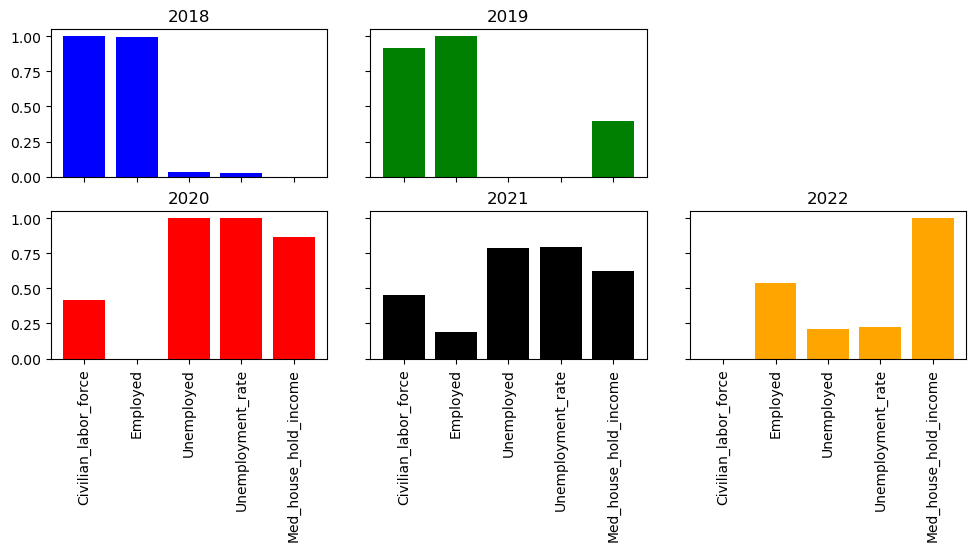

In [599]:
fig,ax = plt.subplots(nrows = 2, ncols = 3,sharex=True,sharey=True,figsize=(10,4))
fig.tight_layout(pad=1.5)

ax[0,0].bar(normd_df.columns,normd_df.loc[2018].values,color = 'blue')
ax[0,0].set_title('2018')


ax[0,1].bar(normd_df.columns,normd_df.loc[2019].values,color = 'green')
ax[0,1].set_title('2019')
ax[0,1].tick_params(labelrotation=90)

ax[1,0].bar(normd_df.columns,normd_df.loc[2020].values,color = 'red')
ax[1,0].set_title('2020')
ax[1,0].set_xticklabels(normd_df.columns, rotation=90)

ax[1,1].bar(normd_df.columns,normd_df.loc[2021].values,color = 'black')
ax[1,1].set_title('2021')
ax[1,1].set_xticklabels(normd_df.columns, rotation=90)

ax[1,2].bar(normd_df.columns,normd_df.loc[2022].values,color = 'orange')
ax[1,2].set_title('2022')
ax[1,2].set_xticklabels(normd_df.columns, rotation=90)

fig.delaxes(ax[0,2])

plt.show()

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

## Vehicle population

In [145]:
veh_reg_data= 'Resources\\Vehicle__Snowmobile__and_Boat_Registrations.csv'
veh_reg_df = pd.read_csv(os.path.join(working_dir, veh_reg_data))

In [146]:
veh_reg_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,BOAT,999999999999,BOT,HILTON,NY,14468,MONROE,1975.0,STARC,BOAT,GAS,NaN,NaN,NaN,08/24/2022,07/31/2025,NaN,N,N,N
1,VEH,9999236,HIS,ROSLYN,NY,11576,NASSAU,1937.0,CHRY,4DSD,GAS,6300.0,NaN,NaN,05/09/2023,06/23/2024,BK,N,N,N
2,TRL,9999,LTR,BETHEL PARK,PA,15102,OUT-OF-STATE,1980.0,CRCF,LTRL,NONE,NaN,3000.0,NaN,11/15/2023,12/31/2024,BR,N,N,N
3,BOAT,999747,BOT,CORTLAND,NY,13045,CORTLAND,1971.0,STARC,BOAT,GAS,NaN,NaN,NaN,03/08/2023,04/30/2026,NaN,N,N,N
4,BOAT,999703,BOT,LOCKPORT,NY,14094,NIAGARA,1971.0,STARC,BOAT,NONE,NaN,NaN,NaN,06/10/2023,05/31/2026,NaN,N,N,N


#### Info

In [147]:
veh_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12177474 entries, 0 to 12177473
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Record Type           object 
 1   VIN                   object 
 2   Registration Class    object 
 3   City                  object 
 4   State                 object 
 5   Zip                   int64  
 6   County                object 
 7   Model Year            float64
 8   Make                  object 
 9   Body Type             object 
 10  Fuel Type             object 
 11  Unladen Weight        float64
 12  Maximum Gross Weight  float64
 13  Passengers            float64
 14  Reg Valid Date        object 
 15  Reg Expiration Date   object 
 16  Color                 object 
 17  Scofflaw Indicator    object 
 18  Suspension Indicator  object 
 19  Revocation Indicator  object 
dtypes: float64(4), int64(1), object(15)
memory usage: 1.8+ GB


#### Casting as category type

In [149]:
columns = veh_reg_df.columns
for col in columns:
    if veh_reg_df[col].dtype == 'object':
        veh_reg_df[col] = veh_reg_df[col].astype('category')

#### Casting to date time

In [153]:
veh_reg_df['Reg Valid Date'] = pd.to_datetime(bx_veh_df['Reg Valid Date'])
veh_reg_df['Reg Expiration Date'] = pd.to_datetime(bx_veh_df['Reg Expiration Date'])

#### Subsetting for vehicles in Bronx,NY 

In [209]:
bx_veh_df = veh_reg_df[(veh_reg_df['State']=='NY') & (veh_reg_df['County'] == 'BRONX') & (veh_reg_df['Record Type']=='VEH')]
bx_veh_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
895,VEH,98W6043,PAS,BRONX,NY,10469,BRONX,1948.0,OLDSM,4DSD,GAS,3723.0,NaN,NaN,2024-03-31,2026-04-07,GR,N,N,N
1043,VEH,98RC219885,PAS,BRONX,NY,10473,BRONX,1949.0,FORD,PICK,GAS,NaN,3142.0,NaN,2023-10-31,2025-10-06,BL,N,N,N
2212,VEH,9481435,HIS,BRONX,NY,10465,BRONX,1924.0,FORD,CONV,GAS,1600.0,NaN,NaN,2024-04-08,2025-03-02,BK,N,N,N
2612,VEH,9309800140,SRF,BRONX,NY,10475,BRONX,1979.0,PORSC,2DSD,GAS,2746.0,NaN,NaN,2024-01-04,2025-08-02,BK,N,N,N
3046,VEH,92A0810528,PAS,BRONX,NY,10473,BRONX,1980.0,PORSC,2DSD,GAS,3144.0,NaN,NaN,2022-10-05,2024-11-01,BK,N,N,N


#### Subsetting time frame from 2018-2022

In [328]:
bx_veh_df = bx_veh_df[(bx_veh_df['Reg Valid Date'] >= '01/01/2018') & (bx_veh_df['Reg Valid Date'] <= '12/31/2022')]
bx_veh_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
3046,VEH,92A0810528,PAS,BRONX,NY,10473,BRONX,1980.0,PORSC,2DSD,GAS,3144.0,NaN,NaN,2022-10-05,2024-11-01,BK,N,N,N
3146,VEH,91607622C,PAS,BRONX,NY,10472,BRONX,1975.0,ROVER,2DSD,GAS,3000.0,NaN,NaN,2022-06-29,2024-08-12,GR,N,N,N
3330,VEH,9119301466,PAS,BRONX,NY,10473,BRONX,1979.0,POR,2DSD,GAS,2555.0,NaN,NaN,2022-05-24,2024-06-26,BK,N,N,N
3755,VEH,9111200812,PAS,BRONX,NY,10461,BRONX,1971.0,PORSC,2DSD,GAS,2238.0,NaN,NaN,2022-09-28,2024-10-19,GR,N,N,N
3875,VEH,9102M197783,PAS,BRONX,NY,10456,BRONX,1969.0,FORD,2DSD,GAS,3174.0,NaN,NaN,2022-06-02,2024-06-24,RD,N,N,N


#### Vehicles by fuel type

In [334]:
fuel_type_df = pd.pivot_table(data = bx_veh_df,values=['Record Type'],index = ['Reg Valid Date'],columns = ['Fuel Type'],aggfunc=['value_counts'])

#Subsetting for cars
fuel_type_df = fuel_type_df.loc(axis=0)[:,['VEH']]

#Removing unecessary indexes'VEH'index,and 'value_counts column
fuel_type_df = fuel_type_df.droplevel(1,axis='index')
fuel_type_df = fuel_type_df.droplevel(0,axis='columns')

#Grouping by year
fuel_type_df = fuel_type_df.groupby(by= fuel_type_df.index.year)[['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX', 'GAS', 'NONE',
                  'OTHER', 'PROPANE']].sum()
fuel_type_df

Fuel Type,COMP N/G,DIESEL,ELECTRIC,FLEX,GAS,NONE,OTHER,PROPANE
Reg Valid Date,,,,,,,,
2018,74,382,11,0,29,1,0,0
2019,5,545,19,0,15,3,0,0
2020,3,48,46,0,6,0,0,0
2021,2,685,36,0,25,0,0,0
2022,23,929,286,59,61442,28,8,0


#### Note:

In [406]:
#The number of registerd gas powered cars in 2022 seems off I've not been able to find the exact ammount, will substitute with
#the mean for that year because it looks like in 2022 There was a spike in vehicle registrations

fuel_type_df.loc[2022]['GAS'] = int(fuel_type_df.loc[2022][['COMP N/G', 'DIESEL', 'ELECTRIC', 'FLEX','NONE','OTHER', 'PROPANE']].mean().round(0))

#### Viz

C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\2186296060.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(fuel_type_df.columns, rotation=90)
C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\2186296060.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(fuel_type_df.columns, rotation=90)
C:\Users\Chris\AppData\Local\Temp\ipykernel_13028\2186296060.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,2].set_xticklabels(fuel_type_df.columns, rotation=90)


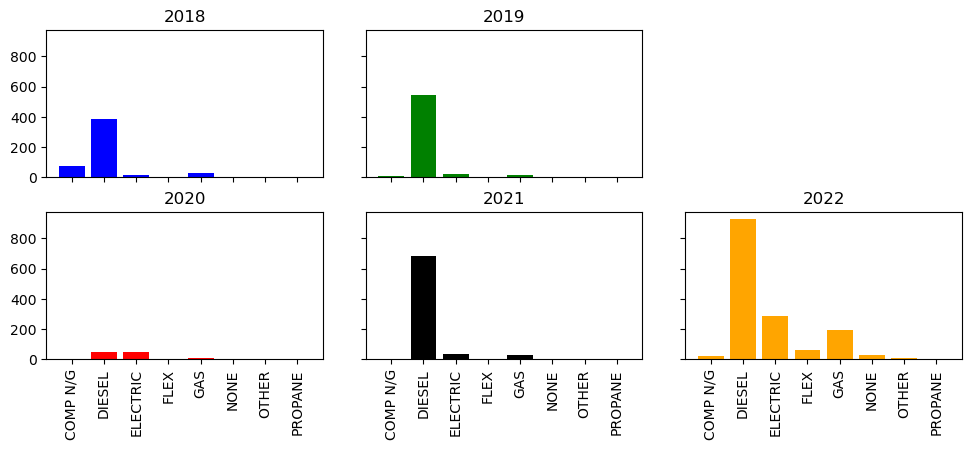

In [600]:
fig,ax = plt.subplots(nrows = 2, ncols = 3,sharex=True,sharey=True,figsize=(10,4))
fig.tight_layout(pad=1.5)

ax[0,0].bar(fuel_type_df.columns,fuel_type_df.loc[2018].values,color = 'blue')
ax[0,0].set_title('2018')


ax[0,1].bar(fuel_type_df.columns,fuel_type_df.loc[2019].values,color = 'green')
ax[0,1].set_title('2019')


ax[1,0].bar(fuel_type_df.columns,fuel_type_df.loc[2020].values,color = 'red')
ax[1,0].set_title('2020')
ax[1,0].set_xticklabels(fuel_type_df.columns, rotation=90)

ax[1,1].bar(fuel_type_df.columns,fuel_type_df.loc[2021].values,color = 'black')
ax[1,1].set_title('2021')
ax[1,1].set_xticklabels(fuel_type_df.columns, rotation=90)

ax[1,2].bar(fuel_type_df.columns,fuel_type_df.loc[2022].values,color = 'orange')
ax[1,2].set_title('2022')
ax[1,2].set_xticklabels(fuel_type_df.columns, rotation=90)

fig.delaxes(ax[0,2])

plt.show()